<h1 style="font-size: 1.6rem; font-weight: bold">Module 6 - Topic 2: Encoder-Decoder</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">ITO 4001: Foundations of Computing</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Images and Diagrams from Monash Faculty of Information Technology

---


Communication can be made by passing messages by word of mouth, a letter, a phone call or an email. Encoding is the process of converting messages into commuication whilst decoding the process of turning communication into original message.

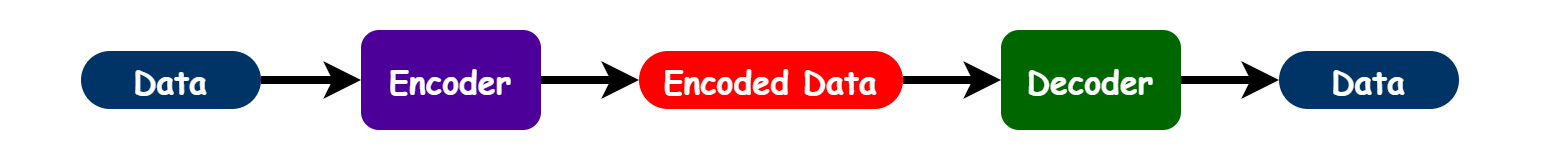

### **Data Compression**

Data compression is the process of reducing the size of the data file. The file may contain information that is both useful and redudant. There are two categories of Data Compression, Lossless and Lossy Compression.

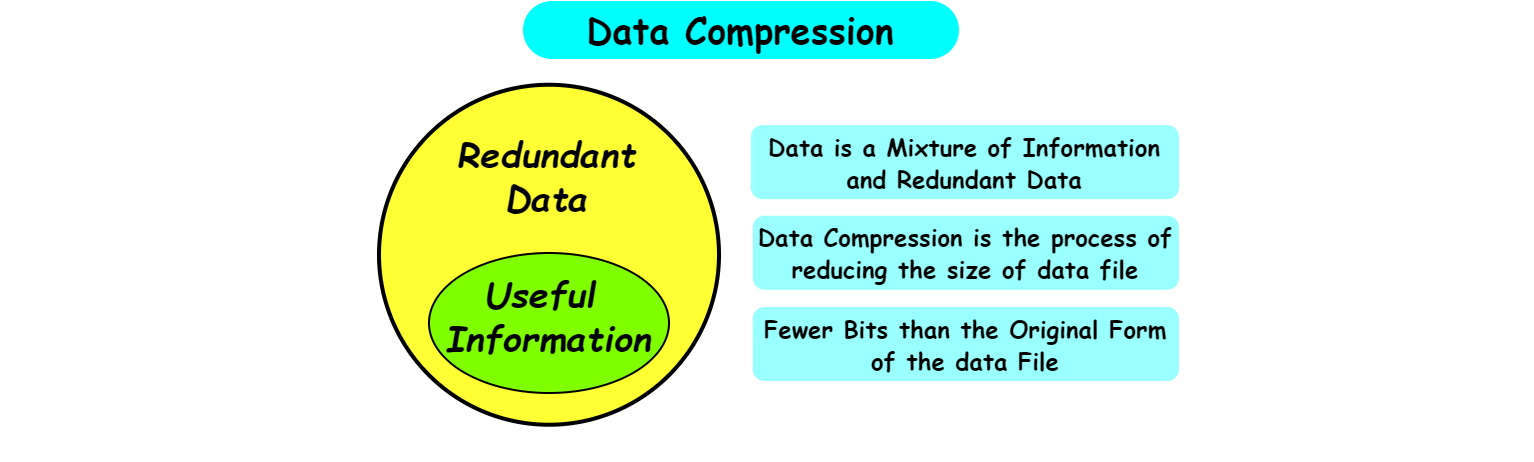

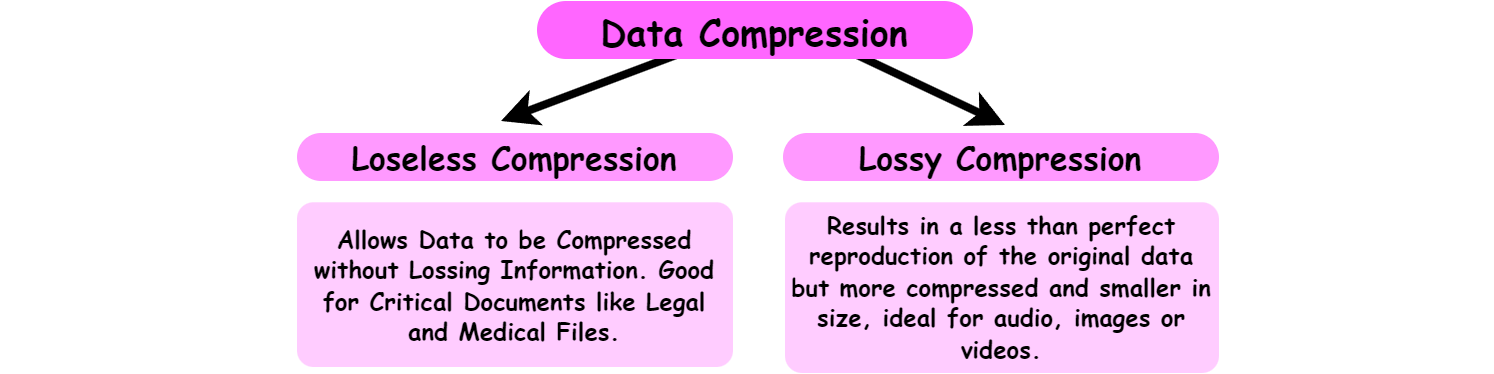

---

### **Huffman Coding**

A **Huffman Tree** is a binary tree used for **optimal data compression**. It creates variable-length codes where frequently used characters get shorter codes, minimizing the total encoded message length.


#### **Key Mathematical Concepts**

#### **Variable-Length Encoding**
Unlike fixed-length encoding (e.g., ASCII uses 8 bits per character), Huffman coding assigns:
- **Short codes** to frequent characters
- **Long codes** to rare characters

#### **Prefix-Free Property**
**Critical Rule**: No codeword can be a prefix of another codeword.

**Example of PREFIX-FREE codes:**
- A: `10`
- B: `11` 
- C: `0`

**Example of NON-prefix-free codes:**
- A: `1`
- B: `10`  ← `1` is a prefix of `10`
- C: `0`

#### **Optimal Compression**
Huffman coding minimizes the **expected code length**:

$$L = \sum_{i=1}^{n} p_i \times l_i$$

Where:
- $p_i$ = probability (frequency) of character $i$
- $l_i$ = length of code for character $i$

### **Huffman Algorithm (Step-by-Step)**

#### **Step 1: Count Frequencies**
Count how often each character appears in the text.

#### **Step 2: Create Priority Queue**
Sort all characters by frequency (ascending order).

#### **Step 3: Build Tree Bottom-Up**
**REPEAT until only one node remains:**
1. Take the **two nodes with lowest frequencies**
2. Create a new **internal node**
3. Set frequency = **sum of both frequencies**
4. Make the two nodes **left and right children**
5. Add new node back to the priority queue

#### **Step 4: Assign Binary Codes**
Traverse from root to each leaf:
- **Left edge** = `0`
- **Right edge** = `1`

### **Example: Text = "PROGRAMMING"**

#### Step 1: Count Frequencies

| Character | Frequency |
|-----------|-----------|
| P         | 1         |
| R         | 2         |
| O         | 1         |
| G         | 2         |
| A         | 1         |
| M         | 2         |
| I         | 1         |
| N         | 1         |

#### Step 2: Priority Queue (Ascending)

| Position | Character | Frequency |
|----------|-----------|-----------|
| 1        | P         | 1         |
| 2        | O         | 1         |
| 3        | A         | 1         |
| 4        | I         | 1         |
| 5        | N         | 1         |
| 6        | R         | 2         |
| 7        | G         | 2         |
| 8        | M         | 2         |

#### Step 3: Build Tree Bottom-Up

**Iteration 1:** Combine P(1) + O(1) = Node₁(2)

Queue: A(1), I(1), N(1), Node₁(2), R(2), G(2), M(2)

**Iteration 2:** Combine A(1) + I(1) = Node₂(2)

Queue: N(1), Node₁(2), Node₂(2), R(2), G(2), M(2)

**Iteration 3:** Combine N(1) + Node₁(2) = Node₃(3)

Queue: Node₂(2), R(2), G(2), M(2), Node₃(3)

**Iteration 4:** Combine Node₂(2) + R(2) = Node₄(4)

Queue: G(2), M(2), Node₃(3), Node₄(4)

**Iteration 5:** Combine G(2) + M(2) = Node₅(4)

Queue: Node₃(3), Node₄(4), Node₅(4)

**Iteration 6:** Combine Node₃(3) + Node₄(4) = Node₆(7)

Queue: Node₅(4), Node₆(7)

**Iteration 7:** Combine Node₅(4) + Node₆(7) = Root(11)

Queue: Root(11)

#### Step 4: Final Huffman Tree

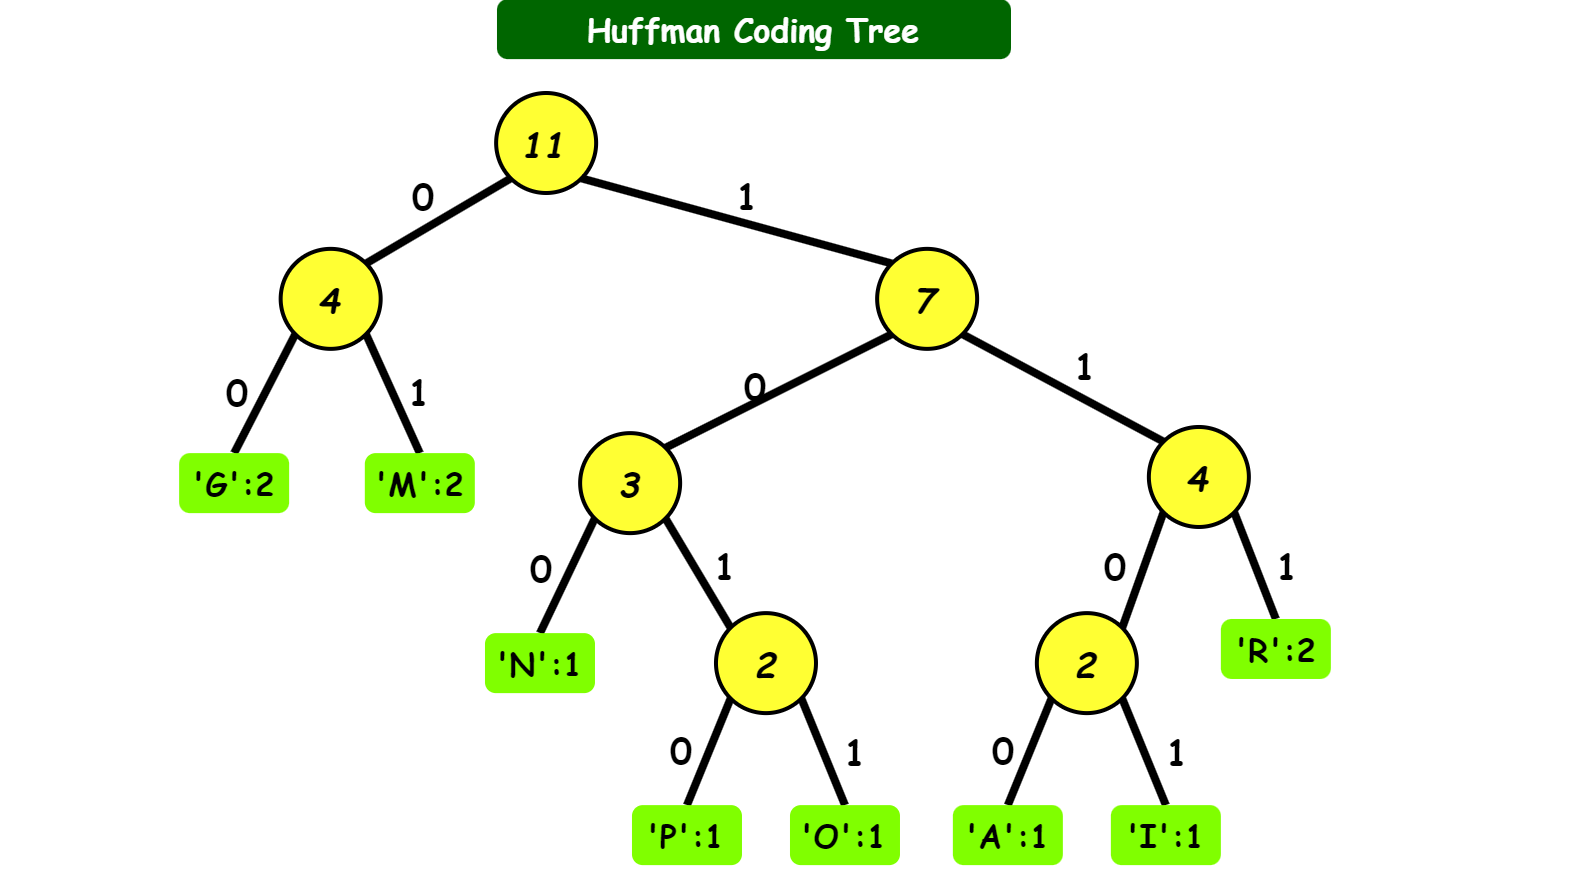

#### Step 5: Assign Codes (Left=0, Right=1)

**Traversing from Root:**
- G: `00`
- M: `01`
- N: `100`
- P: `1010`
- O: `1011`
- A: `1100`
- I: `1101`
- R: `111`

#### Step 6: Encode "PROGRAMMING"

$$\text{PROGRAMMING} = \text{P-R-O-G-R-A-M-M-I-N-G}$$

$$= 1010 + 111 + 1011 + 00 + 111 + 1100 + 01 + 01 + 1101 + 100 + 00$$

$$= 101011110110011111000101011011000$$

**Total bits:** 33 bits (vs 88 bits with 8-bit ASCII)
**Compression ratio:** 62.5% savings!


### **Decoding Process**

To decode `101011110110011111000101011011000`:

**Step-by-step:**
1. Start at root, follow path based on bits
2. When reaching a leaf, output character and return to root
3. Continue until all bits consumed

**Result:** PROGRAMMING ✓